<a href="https://colab.research.google.com/github/RockhoRockho/Deep_Learning/blob/main/_3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [6]:
d1 = "Think like a man of action and act like man of thought"
d2 = "Try no to become a man of success but rather try to become a man of value"
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.17647058823529413
0.07142857142857142
0.0625


In [7]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

## 한국어 형태소 분석기 설치

In [8]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 7.0 MB/s 
     |████████████████████████████████| 448 kB 37.9 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [11]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [16]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [17]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [18]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [19]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [20]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [21]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9646067023277283),
 ('따뜻', 0.952574610710144),
 ('듯', 0.9493365287780762),
 ('마음', 0.9437036514282227),
 ('아름다운', 0.9422289133071899),
 ('반영', 0.9422202110290527),
 ('느낌', 0.9418894052505493),
 ('이야기', 0.9407543540000916),
 ('외로운', 0.9389114379882812),
 ('남', 0.9383293390274048)]

* t-sne을 이용한 단어 벡터 시각화

In [22]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [23]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 3.56491916e-02,  1.04517721e-01,  1.31411985e-01, ...,
        -9.47830901e-02, -5.21635376e-02,  1.94958821e-01],
       [ 1.97450146e-01,  3.87393922e-01,  3.42709899e-01, ...,
        -1.51695954e-02,  7.32409433e-02,  4.03866544e-02],
       [ 4.49309021e-01,  8.89316082e-01,  4.23557639e-01, ...,
        -1.16276346e-01,  3.43516529e-01, -2.32670805e-04],
       ...,
       [-2.74691178e-04,  8.59046075e-03,  1.86673235e-02, ...,
        -2.03991421e-02, -3.62216728e-03,  3.03292628e-02],
       [-1.59688666e-03,  5.11600450e-03,  2.03839317e-02, ...,
        -1.65130887e-02, -3.97962844e-03,  1.54740466e-02],
       [ 1.22967537e-03,  5.18403295e-03,  3.04358490e-02, ...,
        -2.20594667e-02, -3.79961170e-03,  1.46999480e-02]], dtype=float32)

In [25]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
어릴,33.617622,-2.879353
때,14.031988,-46.700222
보,17.069736,-54.174541
고,16.671019,-53.073002
지금,19.454273,-52.429394
다시,18.966217,-53.306858
봐도,20.196795,-53.401581
재밌,33.295532,-50.658051
어요,33.314857,-49.618664
ㅋㅋ,35.607464,-48.214169


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


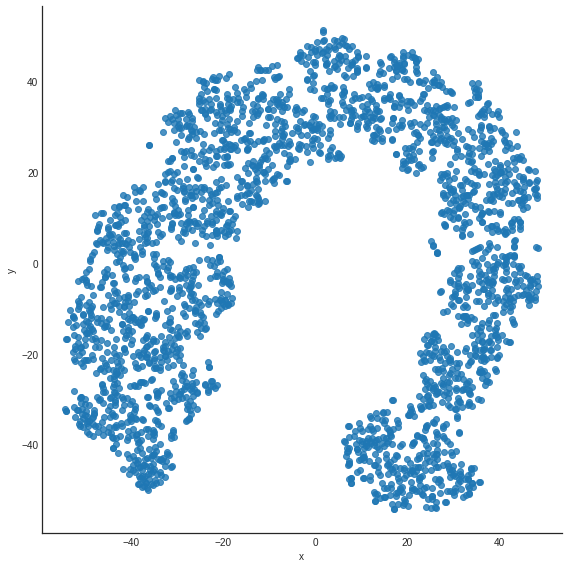

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [29]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([1, 5, 5, ..., 2, 2, 2])

In [30]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,33.617622,-2.879353,1
때,14.031988,-46.700222,5
보,17.069736,-54.174541,5
고,16.671019,-53.073002,5
지금,19.454273,-52.429394,5
다시,18.966217,-53.306858,5
봐도,20.196795,-53.401581,5
재밌,33.295532,-50.658051,5
어요,33.314857,-49.618664,5
ㅋㅋ,35.607464,-48.214169,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


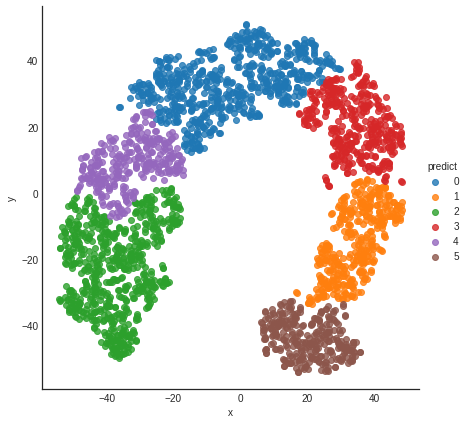

In [32]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue="predict")
plt.show()

#### average

In [34]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([2, 4, 4, ..., 1, 1, 1])

In [35]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,33.617622,-2.879353,2
때,14.031988,-46.700222,4
보,17.069736,-54.174541,4
고,16.671019,-53.073002,4
지금,19.454273,-52.429394,4
다시,18.966217,-53.306858,4
봐도,20.196795,-53.401581,4
재밌,33.295532,-50.658051,4
어요,33.314857,-49.618664,4
ㅋㅋ,35.607464,-48.214169,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


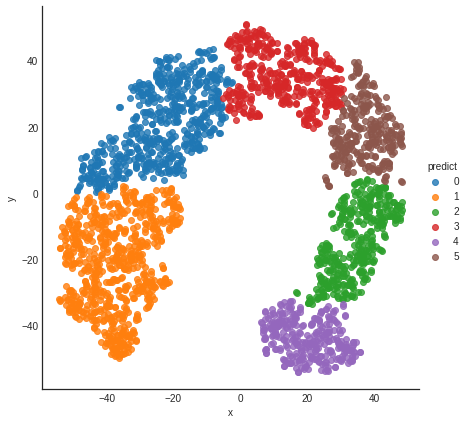

In [36]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### complete

In [37]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([1, 2, 2, ..., 5, 5, 5])

In [38]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,33.617622,-2.879353,1
때,14.031988,-46.700222,2
보,17.069736,-54.174541,2
고,16.671019,-53.073002,2
지금,19.454273,-52.429394,2
다시,18.966217,-53.306858,2
봐도,20.196795,-53.401581,2
재밌,33.295532,-50.658051,2
어요,33.314857,-49.618664,2
ㅋㅋ,35.607464,-48.214169,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


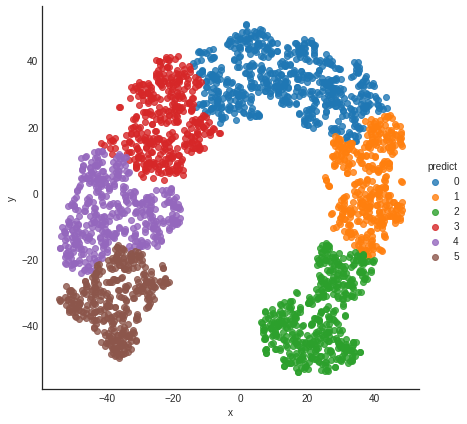

In [39]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [42]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,48.009016,53.907596,52.986694,51.544224,52.522347,52.283976,47.790247,46.750988,45.389481,49.267179,42.186945,49.021644,49.169268,43.460585,44.089207,74.944049,43.305660,46.137241,47.122835,47.241223,87.657413,36.829000,56.142350,52.131075,46.814742,32.923225,46.861541,51.619203,23.671548,43.708527,32.441153,45.346820,48.853434,70.565131,27.774078,45.301851,43.616228,41.480298,29.746097,...,79.527619,59.234377,59.669537,91.096282,66.858592,78.521471,57.388033,62.684390,77.867000,82.162269,66.518793,64.998706,76.689585,76.479720,72.638683,82.280931,85.815785,89.254445,77.215347,60.329015,83.609618,75.216249,72.809664,15.521322,70.247048,79.147786,81.132312,66.305631,74.440257,71.510419,63.467650,81.563829,49.898798,90.161275,83.697121,76.722586,79.476550,79.033834,86.083657,80.398393
1,48.009016,0.000000,8.068046,6.897594,7.888256,8.245863,9.105660,19.665923,19.502470,21.628527,7.263753,11.144436,7.228634,90.368453,8.962364,10.712686,64.680068,10.390023,8.962040,8.886042,5.641675,63.695138,83.810112,91.343985,4.176602,5.479087,79.727563,17.865596,14.100385,31.299555,6.801808,15.590226,7.575119,3.124638,74.209183,20.458981,7.729609,8.376960,9.354636,77.543982,...,49.625241,52.609873,50.619155,66.427030,44.495841,61.044120,66.669396,68.102444,81.066408,48.783443,75.179582,45.776486,56.704078,46.613559,66.183388,59.585562,68.981941,62.992674,50.026512,44.255087,63.243373,52.173756,62.363806,61.711636,77.723933,49.421396,52.454077,42.483578,66.043375,70.986656,74.249787,60.608851,67.362289,67.192530,70.429191,49.967268,52.854955,48.453197,54.593209,49.393612
2,53.907596,8.068046,0.000000,1.171480,2.954921,2.085549,3.221174,16.602474,16.871869,19.472375,13.925836,19.183008,13.999894,97.773948,16.982992,18.596140,71.385500,18.371440,16.579658,16.267363,13.175461,68.503050,90.271374,99.159941,5.332881,13.159808,86.224817,15.250770,9.063368,34.754902,14.868827,21.796681,15.430588,5.581281,81.820286,26.162962,15.583252,10.551165,12.587813,83.633861,...,53.783306,59.977364,57.854001,71.015794,50.405263,66.981035,74.602174,75.878216,88.568694,52.098930,83.015333,52.088662,62.427578,50.939816,73.217723,64.761469,74.774980,67.383125,54.760776,51.043084,68.678952,57.588360,69.111656,68.208292,85.487166,53.630790,56.754002,48.266542,72.902057,78.388952,82.166928,66.038633,75.427191,72.068784,76.650912,54.792988,57.571366,52.510394,58.132959,53.298664
3,52.986694,6.897594,1.171480,0.000000,2.856700,2.307081,3.541053,16.799001,16.998524,19.549865,12.879293,18.018250,12.944241,96.675434,15.820173,17.449706,70.419186,17.213776,15.457855,15.167499,12.051056,67.802480,89.291271,98.012506,4.358690,12.023750,85.239368,15.352500,9.499034,34.117846,13.698906,20.791777,14.284009,4.453552,80.724976,25.226393,14.437038,9.825265,11.799975,82.700355,...,53.161875,58.914598,56.809439,70.347538,49.539459,66.121275,73.457304,74.757813,87.490076,51.593097,81.886063,51.169037,61.595382,50.291864,72.205085,64.007062,73.938652,66.740601,54.060344,50.057766,67.890292,56.796027,68.138728,67.218661,84.369178,53.002057,56.115810,47.416129,71.914378,77.324065,81.024789,65.249423,74.258068,71.360550,75.754583,54.079919,56.875911,51.901573,57.602520,52.711921
4,51.544224,7.888256,2.954921,2.856700,0.000000,1.004063,1.223309,13.954143,14.142701,16.694121,14.695495,18.877283,14.721397,96.047012,16.747002,18.583207,72.344386,18.208522,16.833380,16.690780,13.465798,70.300648,88.053212,97.816848,6.683503,13.345321,84.024715,12.495843,6.845272,31.948371,14.469135,19.761037,15.460032,4.821443,82.093811,23.888460,15.614439,7.958113,10.073725,81.287600,...,55.766413,60.473020,58.453615,72.890118,51.743218,68.330377,74.444926,75.963285,88.950731,54.310395,83.01

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

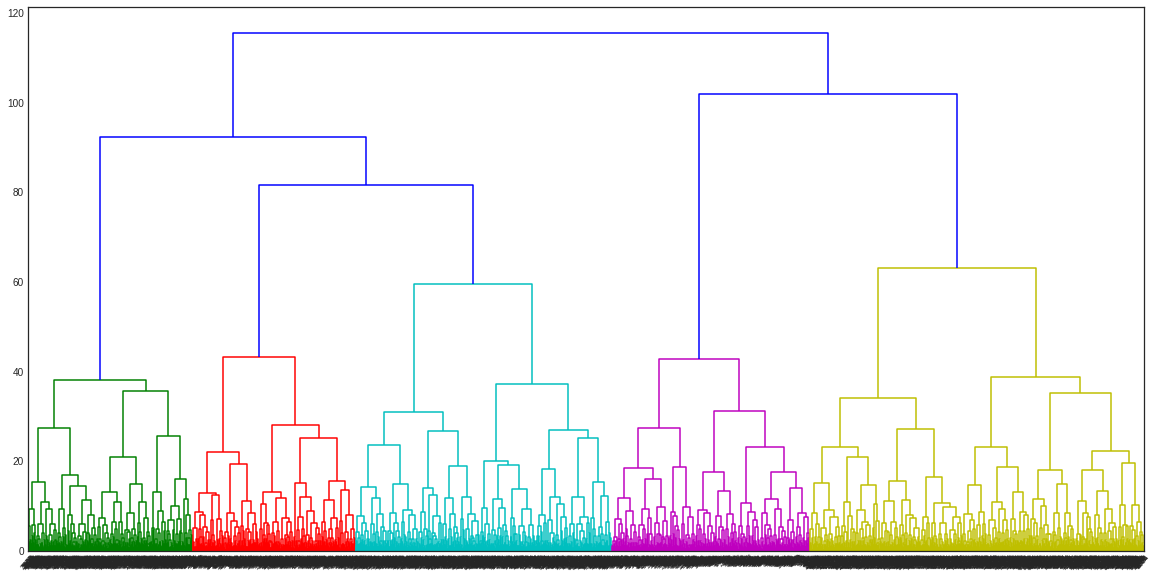

In [45]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

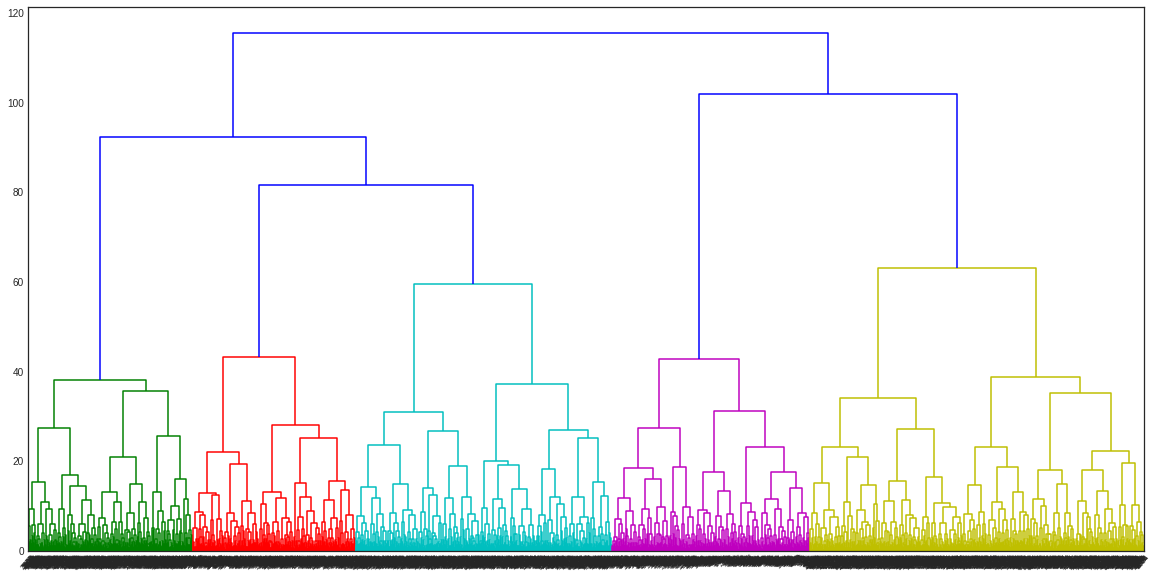

In [46]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [48]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,33.617622,-2.879353,1
때,14.031988,-46.700222,1
보,17.069736,-54.174541,1
고,16.671019,-53.073002,1
지금,19.454273,-52.429394,1
다시,18.966217,-53.306858,1
봐도,20.196795,-53.401581,1
재밌,33.295532,-50.658051,1
어요,33.314857,-49.618664,1
ㅋㅋ,35.607464,-48.214169,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


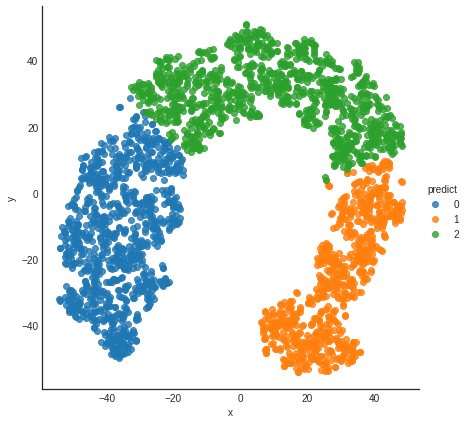

In [49]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### 클러스터 개수 6

In [50]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 1, 1, ..., 5, 5, 5], dtype=int32)

In [51]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,33.617622,-2.879353,4
때,14.031988,-46.700222,1
보,17.069736,-54.174541,1
고,16.671019,-53.073002,1
지금,19.454273,-52.429394,1
다시,18.966217,-53.306858,1
봐도,20.196795,-53.401581,1
재밌,33.295532,-50.658051,1
어요,33.314857,-49.618664,1
ㅋㅋ,35.607464,-48.214169,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


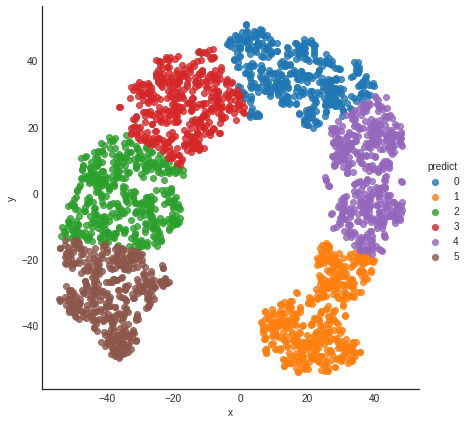

In [52]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()